In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4125,2716-GFZOR,Male,0,Yes,No,43,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),86.1,3551.65,No
2902,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.1,450.9,No
454,4785-FCIFB,Female,0,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.4,1417.9,No
2427,7854-FOKSF,Male,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,35.9,35.9,Yes
2625,0880-FVFWF,Male,0,No,No,56,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,86.4,4922.4,No


In [3]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.iloc[488]['TotalCharges']

' '

In [9]:
df1 = df[df.TotalCharges !=' ']
df1.shape

(7032, 20)

In [10]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\ABDUL QADIR\.conda\envs\python\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


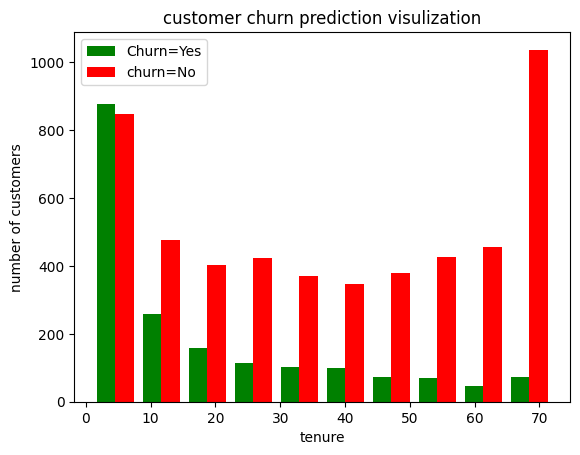

In [12]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel('number of customers')
plt.title("customer churn prediction visulization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'churn=No'])
plt.legend()


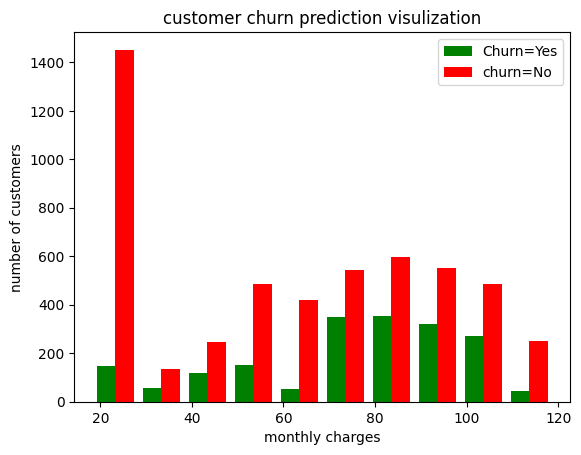

In [13]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("monthly charges")
plt.ylabel('number of customers')
plt.title("customer churn prediction visulization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'churn=No'])
plt.legend()


In [14]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [15]:
# it give unique values in each column in df dataset
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':        
            print(f'{column} : {df[column].unique()}')


In [16]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
df1.replace('No internet service', 'No',inplace=True)
df1.replace('No phone service', 'No',inplace=True)

C:\Users\ABDUL QADIR\.conda\envs\python\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [18]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                  'PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No':0},inplace=True)

C:\Users\ABDUL QADIR\.conda\envs\python\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
for col in df1: 
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [21]:
df1['gender'].replace({'Female' :1, 'Male': 0}, inplace=True)

In [22]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [23]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5494,1,0,0,0,8,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
5513,1,1,0,0,67,1,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
3004,0,0,1,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
606,0,0,1,1,38,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
6720,0,0,1,1,70,1,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0


In [25]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [26]:
for col in df2: 
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [27]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

In [31]:
X_train.shape

(5625, 26)

In [36]:
X_test.shape

(1407, 26)

In [37]:
len(X_train.columns)

26

In [38]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
#     keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
176/176 [==============================] - 1s 2ms/step - loss: 0.5101 - accuracy: 0.7484
Epoch 2/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.7925
Epoch 3/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.7963
Epoch 4/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8030
Epoch 5/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8036


In [39]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.7868


[0.4429545998573303, 0.7867803573608398]

In [40]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.18424718],
       [0.39685857],
       [0.01003006],
       [0.7000937 ],
       [0.38654825]], dtype=float32)

In [41]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [42]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.66      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

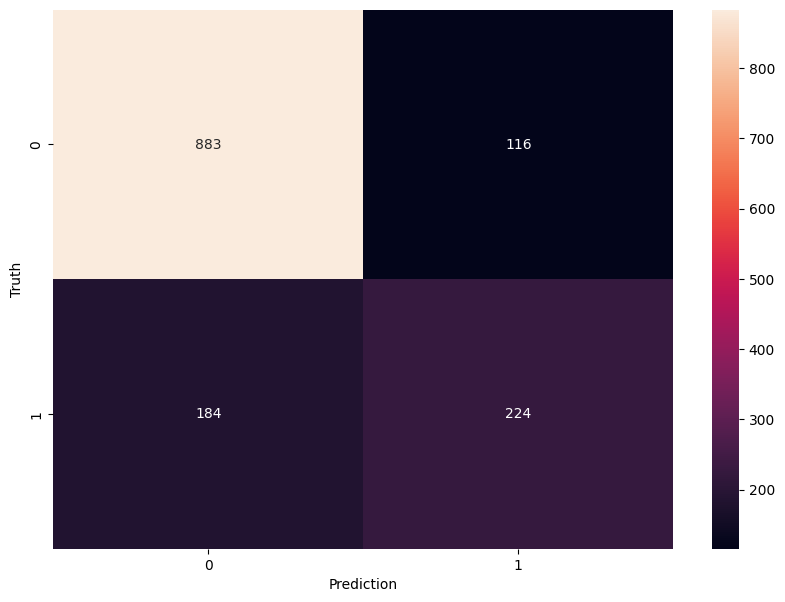

In [45]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [46]:
round((883+224)/(883+116+184+224),2)

0.79